# Generate LSST filter transmission into PySynPhot
=========================================================================


The purpose is to start to use PySynPhot software to calculate things on
SED, filter transmission,... For Calibration

- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date May 1st 2017

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import os
import re

In [10]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [22]:
os.environ['PYSYN_CDBS']

'/Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs'

In [23]:
import pysynphot as S

In [25]:
plt.ion()
plt.clf()

In [5]:
detdatafilename='LSST_data/transmissions-LSST.dat'

In [6]:
df=pd.read_csv(detdatafilename,names=['wl','Topt','Tccd','U','G','R','I','Z','Y4','atm'],sep='\t')

In [58]:
wl=np.asarray(df['wl'])*10  # in Angstrom
u=np.asarray(df['U'])*0.01
g=np.asarray(df['G'])*0.01
r=np.asarray(df['R'])*0.01
i=np.asarray(df['I'])*0.01
z=np.asarray(df['Z'])*0.01
y4=np.asarray(df['Y4'])*0.01
atm=np.asarray(df['atm'])*0.01

In [59]:
y4[np.where(wl>11000)]=0

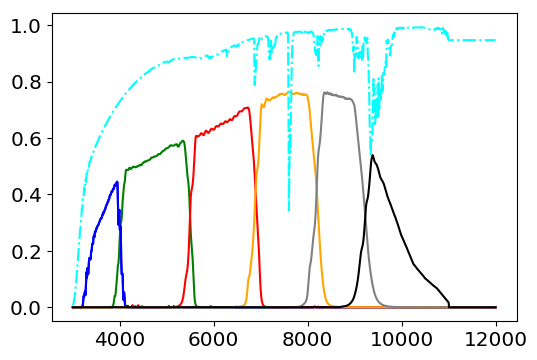

In [60]:
plt.plot(wl,u,'b')
plt.plot(wl,g,'g')
plt.plot(wl,u,'b')
plt.plot(wl,r,'r')
plt.plot(wl,i,color='orange')
plt.plot(wl,z,color='grey')
plt.plot(wl,y4,color='k')
plt.plot(wl,atm,color='cyan',ls='-.')

In [61]:
bp_u = S.ArrayBandpass(wl,u, name='LSST_U')
bp_g = S.ArrayBandpass(wl,g, name='LSST_G')
bp_r = S.ArrayBandpass(wl,r, name='LSST_R')
bp_i = S.ArrayBandpass(wl,i, name='LSST_I')
bp_z = S.ArrayBandpass(wl,z, name='LSST_Z')
bp_y4 = S.ArrayBandpass(wl,y4, name='LSST_Y4')
bp_atm= S.ArrayBandpass(wl,atm, name='LSST_ATM')
#print bp_u.throughput
#print bp_u.sample(3500)
#print bp_u.sample(3800)

In [62]:
bp_u_atm = S.ArrayBandpass(wl,u*atm, name='LSST_U_ATM')
bp_g_atm = S.ArrayBandpass(wl,g*atm, name='LSST_G_ATM')
bp_r_atm = S.ArrayBandpass(wl,r*atm, name='LSST_R_ATM')
bp_i_atm = S.ArrayBandpass(wl,i*atm, name='LSST_I_ATM')
bp_z_atm = S.ArrayBandpass(wl,z*atm, name='LSST_Z_ATM')
bp_y4_atm = S.ArrayBandpass(wl,y4*atm, name='LSST_Y4_ATM')

In [63]:
#bp = S.ObsBandpass('LSST_G_ATM,LSST_R_ATM,LSST_I_ATM,LSST_Z_ATM')
#other_bp = S.ObsBandpass('LSST_U_ATM,LSST_Y4_ATM')
#bp.check_overlap(other_bp)
box_bp = S.Box(2000, 10000)
bp_u.check_overlap(box_bp)

'partial'

In [45]:
bp_u.check_sig(box_bp)

True

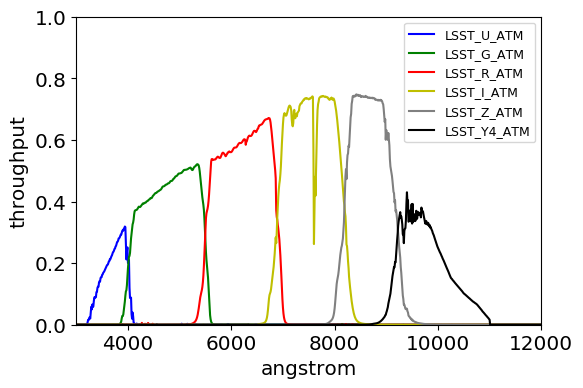

In [72]:
plt.plot(bp_u_atm.wave, bp_u_atm.throughput, 'b',
...          bp_g_atm.wave, bp_g_atm.throughput, 'g')
plt.plot(bp_r_atm.wave, bp_r_atm.throughput, 'r',
...          bp_i_atm.wave, bp_i_atm.throughput,'y')
plt.plot(bp_z_atm.wave, bp_z_atm.throughput, color='grey')
plt.plot(bp_y4_atm.wave, bp_y4_atm.throughput, color='k')
plt.xlim(3000, 12000)
plt.ylim(0, 1.)
plt.xlabel(bp_u_atm.waveunits)
plt.ylabel('throughput')
plt.legend([bp_u_atm.name, bp_g_atm.name,bp_r_atm.name, bp_i_atm.name,bp_z_atm.name, bp_y4_atm.name], loc=1,fontsize=9)